# Part I - Exploration of Prosper Loan Dataset 
## by Paul Ajogi

## Table of Contents

<ul>
    <li><a href = "#intro">Introduction</a></li>
    <li><a href = "#wrangle">Preliminary Wrangling</a></li>
    <li><a href = "#uni">Univariate Explorationn</a></li>
    <li><a href = "#bi">Bivariate Exploration</a></li>
    <li><a href = "#multi">Multivariate Exploration</a></li>
    <li><a href = "#conclusion">Conclusions</a></li>
</ul>

<span id = "intro"></span>
  
## Introduction

This project is aimed at exploring a dataset known as the Prosper Loan Dataset. The Prosper Loan Dataset is a dataset that contains data of the loan platform known as '<a href="https://www.prosper.com/">Prosper</a>'. This dataset contains information about the actual loan, the borrower (e.g Borrower's State, Occupation, Employment Status and more ) and some information about the lender/Investors e.g (Lender's Yield).  

The Prosper Loan Data we would be exporing was last updated on the 3rd November, 2014.

<span id = "wrangle"></span>

## Preliminary Wrangling
In this section of the project, we will wrangle the Prosper Loan dataset, load it into a pandas dataframe and make it clean and suitable for exploration. First let's import all the necessary packages for the project

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Time to Load in the dataset to a pandas dataframe and describe its properties for analysis.

In [2]:
#load datasets into a pandas dataframe
prosper_loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
#check the shape of the datframe
print(prosper_loan_df.shape)

(113937, 81)


In [4]:
#display the first four rows of the dataframe
prosper_loan_df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
#Check some properties of the dataframe like the datatypes of each columns
prosper_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

We will make a copy of the `prosper_loan_df` and name it `prosper_copy`. We will make use of the copy to perform the following cleaning operation.

* Change the `ListingCategory` datatype from int to  object.
* Change all the `ListingCategory` from the numerical values to their real categories.

In [6]:
#Make a copy of the dataframe
prosper_copy = prosper_loan_df.copy()

In [7]:
#Change the name of ListingCategory (numeric) to ListingCategory 
prosper_copy.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

In [8]:
#Change the datatype from Int to string 
prosper_copy['ListingCategory'] = prosper_copy['ListingCategory'].astype('str')

In [9]:
#Change the ListingCategories from the numeric values to their actual categories.
""" The category of the listing the borrower selected when posting their listing 0 - Not Available"""


prosper_copy.loc[prosper_copy['ListingCategory'] == '0', ['ListingCategory']] = "Not Available"
prosper_copy.loc[prosper_copy['ListingCategory'] == '1', ['ListingCategory']] = "Debt Consolidation"
prosper_copy.loc[prosper_copy['ListingCategory'] == '2', ['ListingCategory']] = "Home Improvement"
prosper_copy.loc[prosper_copy['ListingCategory'] == '3', ['ListingCategory']] = "Business"
prosper_copy.loc[prosper_copy['ListingCategory'] == '4', ['ListingCategory']] = "Personal Loan"
prosper_copy.loc[prosper_copy['ListingCategory'] == '5', ['ListingCategory']] = "Student Use"
prosper_copy.loc[prosper_copy['ListingCategory'] == '6', ['ListingCategory']] = "Auto"
prosper_copy.loc[prosper_copy['ListingCategory'] == '7', ['ListingCategory']] = "Other"
prosper_copy.loc[prosper_copy['ListingCategory'] == '8', ['ListingCategory']] = "Baby&Adoption"
prosper_copy.loc[prosper_copy['ListingCategory'] == '9', ['ListingCategory']] = "Boat"
prosper_copy.loc[prosper_copy['ListingCategory'] == '10', ['ListingCategory']] = "Cosmetic Procedure"
prosper_copy.loc[prosper_copy['ListingCategory'] == '11', ['ListingCategory']] = "Engagement Ring"
prosper_copy.loc[prosper_copy['ListingCategory'] == '12', ['ListingCategory']] = "Green Loans"
prosper_copy.loc[prosper_copy['ListingCategory'] == '13', ['ListingCategory']] = "Household Expenses"
prosper_copy.loc[prosper_copy['ListingCategory'] == '14', ['ListingCategory']] = "Large Purchases"
prosper_copy.loc[prosper_copy['ListingCategory'] == '15', ['ListingCategory']] = "Medical/Dental"
prosper_copy.loc[prosper_copy['ListingCategory'] == '16', ['ListingCategory']] = "Motorcycle"
prosper_copy.loc[prosper_copy['ListingCategory'] == '17', ['ListingCategory']] = "RV"
prosper_copy.loc[prosper_copy['ListingCategory'] == '18', ['ListingCategory']] = "Raxes"
prosper_copy.loc[prosper_copy['ListingCategory'] == '19', ['ListingCategory']] = "Vacation"
prosper_copy.loc[prosper_copy['ListingCategory'] == '20', ['ListingCategory']] = "Wedding Loans"

Lets test by checking the value counts of the `ListingCategory`.

In [10]:
#Check value counts
prosper_copy['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Raxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [11]:
#descriptive statistics of Prosper Loan Data.
prosper_copy.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


Now, let's slice the dataset to work on just the variables of interest.

In [12]:
#List of variables of interest
interest = ['LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory', 'EmploymentStatus', 'CurrentCreditLines',
           'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'TotalProsperLoans', 'ProsperPrincipalBorrowed', 
            'LP_InterestandFees']

In [13]:
#Sliced Dataframe
vars_of_interest = prosper_copy[interest]

In [14]:
#Prosper Loan head
vars_of_interest.head()

,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,EmploymentStatus,CurrentCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,TotalProsperLoans,ProsperPrincipalBorrowed,LP_InterestandFees
0,Completed,0.16516,0.1580,Not Available,Self-employed,5.0,1,24.0,NaN,NaN,1971.14
1,Current,0.12016,0.0920,Home Improvement,Employed,14.0,13,389.0,NaN,NaN,0.00
2,Completed,0.28269,0.2750,Not Available,Not available,NaN,0,0.0,NaN,NaN,1185.63
3,Current,0.12528,0.0974,Motorcycle,Employed,5.0,7,115.0,NaN,NaN,1052.11
4,Current,0.24614,0.2085,Home Improvement,Employed,19.0,6,220.0,1.0,11000.0,1256.63


In [15]:
#Check the info of the vars_of_interest
vars_of_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanStatus                   113937 non-null  object 
 1   BorrowerAPR                  113912 non-null  float64
 2   BorrowerRate                 113937 non-null  float64
 3   ListingCategory              113937 non-null  object 
 4   EmploymentStatus             111682 non-null  object 
 5   CurrentCreditLines           106333 non-null  float64
 6   OpenRevolvingAccounts        113937 non-null  int64  
 7   OpenRevolvingMonthlyPayment  113937 non-null  float64
 8   TotalProsperLoans            22085 non-null   float64
 9   ProsperPrincipalBorrowed     22085 non-null   float64
 10  LP_InterestandFees           113937 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 9.6+ MB


In [16]:
vars_of_interest.describe()

,BorrowerAPR,BorrowerRate,CurrentCreditLines,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,TotalProsperLoans,ProsperPrincipalBorrowed,LP_InterestandFees
count,113912.000000,113937.000000,106333.000000,113937.00000,113937.000000,22085.000000,22085.000000,113937.000000
mean,0.218828,0.192764,10.317192,6.96979,398.292161,1.421100,8472.311961,1077.542901
std,0.080364,0.074818,5.457866,4.63097,447.159711,0.764042,7395.507650,1183.414168
min,0.006530,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.349900
25%,0.156290,0.134000,7.000000,4.00000,114.000000,1.000000,3500.000000,274.870000
50%,0.209760,0.184000,10.000000,6.00000,271.000000,1.000000,6000.000000,700.840100
75%,0.283810,0.250000,13.000000,9.00000,525.000000,2.000000,11000.000000,1458.540000
max,0.512290,0.497500,59.000000,51.00000,14985.000000,8.000000,72499.000000,15617.030000


### What is the structure of your dataset?

This dataset of prosper loan data contains 113937 loans with 81 variables. Majority of the variables are numerical (int and float) datatypes, while a few of them are object and boolean datatype. In Summary, the dataset contains:-

* 50 float 
* 11 int
* 17 objects and
* 3 booleans

The datasets was further sliced into a smaller dataframe called `vars_of_interest` containing just the variables of interest for our analysis. The `vars_of_interest` consists of 11 variables of which 7 are float, 1 is an int and 3 are of object type.



### What is/are the main feature(s) of interest in your dataset?

I am interested in the features that determines the current loan status (LoanStatus) of each loan from the dataset. The `LoanStatus` in this dataset is a categorical variable that hold the current status of the borrower. This status can be one of the following value:-

* Cancelled
* Completed
* Current
* Chargedoff
* Defaulted
* FinalPaymentInProgress
* PastDue




### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For each loan, I think the LoanStatus would be influenced more by the borrowers interest rate (BorrowerRate). Other factors that may influence the loan status can be, ListingCategory, EmploymentStatus, CurrentCreditLines, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, TotalProsperLoans, ProsperPrincipalBorrowed, LP_InterestandFees'.

<span id = "uni"></span>
## Univariate Exploration 

In this section, we will explore each variable of interest with the most suitable plots. We will precede first with the main variable of interest, the `LoanStatus`.

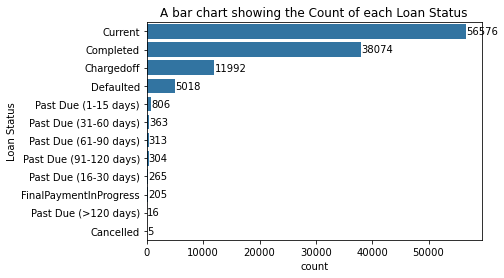

In [17]:
#Plot the bar horizontally and show the counts beside each bar
base_color = sb.color_palette()[0]

order = vars_of_interest['LoanStatus'].value_counts().index
counts = vars_of_interest['LoanStatus'].value_counts()

sb.countplot(data = vars_of_interest, y = 'LoanStatus', color = base_color, order = order);
plt.title('A bar chart showing the Count of each Loan Status');
plt.ylabel('Loan Status');

for i in range(counts.shape[0]):
    count = counts[i]
    plt.text(count+1, i, count, va = 'center');

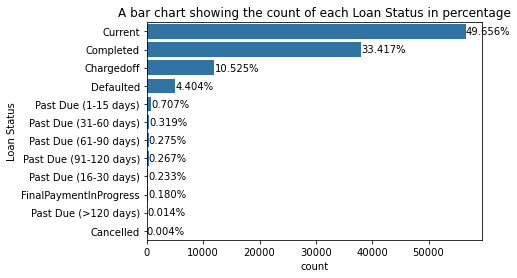

In [18]:
#Plot the bar horizontally and show the percentage beside each bar
loan_number = vars_of_interest.shape[0]

sb.countplot(data = vars_of_interest, y = 'LoanStatus', color = base_color, order = order);
plt.title('A bar chart showing the count of each Loan Status in percentage');
plt.ylabel('Loan Status');

for i in range(counts.shape[0]):
    count = counts[i]
    percentage = '{:0.3f}%'.format(100*count/loan_number)
    plt.text(count+1, i, percentage, va = 'center');

Close to half of the LoanStatus are Current status, majurity of the loans borrowed are still within the period of their term. The remaining half is dominated by loans that are completed, chargedoff and Defaulted with 33.417%, 10.525% and 4.404% respectively. The remaining categories, Past Due, FinalPaymentInProgress and Cancelled have the least count with their cummulative percentage not up to 2.000%.

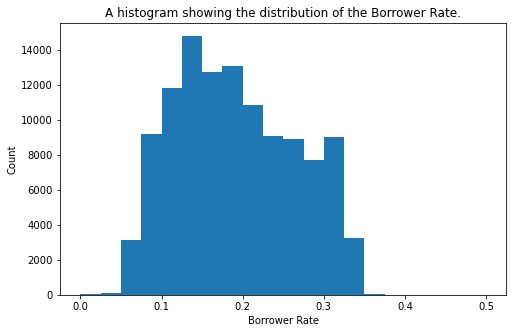

In [19]:
binsize = 0.025
bins = np.arange(0, vars_of_interest['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(vars_of_interest['BorrowerRate'], bins = bins);
plt.title('A histogram showing the distribution of the Borrower Rate.');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');

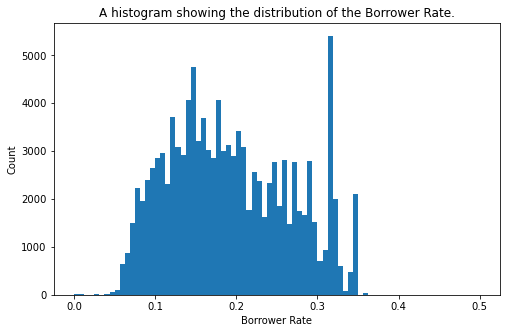

In [20]:
#Adjust binsize
binsize = 0.00625
bins = np.arange(0, vars_of_interest['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(vars_of_interest['BorrowerRate'], bins = bins);
plt.title('A histogram showing the distribution of the Borrower Rate.');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');

When plotted on a smaller bins, the BorrowerRate is seen to be unimodal and slightly scewed to the right. When the bins were adjusted, we discovered some high spikes down the right side of the distribution.

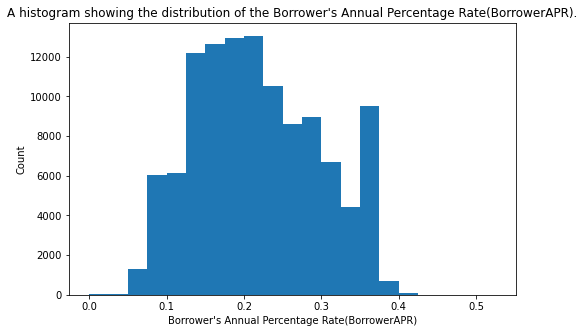

In [21]:
binsize = 0.025
bins = np.arange(0, vars_of_interest['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(vars_of_interest['BorrowerAPR'], bins = bins);
plt.title('A histogram showing the distribution of the Borrower\'s Annual Percentage Rate(BorrowerAPR).');
plt.xlabel('Borrower\'s Annual Percentage Rate(BorrowerAPR)');
plt.ylabel('Count');

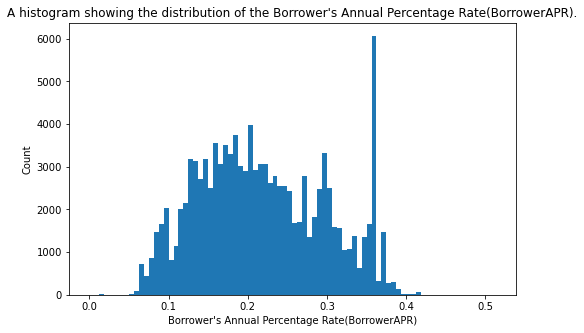

In [22]:
binsize = 0.00625
bins = np.arange(0, vars_of_interest['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(vars_of_interest['BorrowerAPR'], bins = bins);
plt.title('A histogram showing the distribution of the Borrower\'s Annual Percentage Rate(BorrowerAPR).');
plt.xlabel('Borrower\'s Annual Percentage Rate(BorrowerAPR)');
plt.ylabel('Count');

The `BorrowerAPR` also has a unimodal distribution that is slightly skewed to the right and some high spikes to the right when plotted on a larger bins.

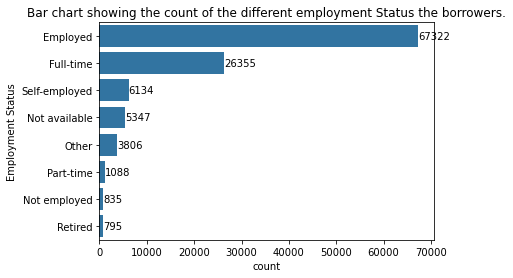

In [23]:
employment_order = vars_of_interest['EmploymentStatus'].value_counts().index
employment_counts = vars_of_interest['EmploymentStatus'].value_counts()

sb.countplot(data = prosper_loan_df, y = 'EmploymentStatus', color = base_color, order = employment_order);

plt.title('Bar chart showing the count of the different employment Status the borrowers.');
plt.ylabel('Employment Status');

for i in range(employment_counts.shape[0]):
    count = employment_counts[i]
    plt.text(count+1, i, count, va = 'center');

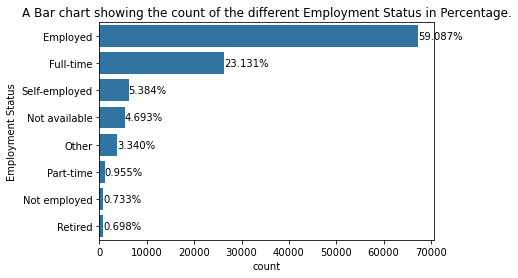

In [24]:
sb.countplot(data = vars_of_interest, y = 'EmploymentStatus', color = base_color, order = employment_order);

plt.title('A Bar chart showing the count of the different Employment Status in Percentage.');
plt.ylabel('Employment Status');

for i in range(employment_counts.shape[0]):
    count = employment_counts[i]
    percentage = '{:0.3f}%'.format(100*count/loan_number)
    plt.text(count+1, i, percentage, va = 'center');

Majority of the borrowers on Prosper loan platform are employed with the percentage of 59.087% employed people, that is more than half of the population. The next categories are Full-time, Self-employed, Not available and Other with the percentage of 23.131%, 5.384%, 4.693% and 3.340% respectively. The rest are Part-time, Not employed and Retired with a few percentage that is not up to 1% each.

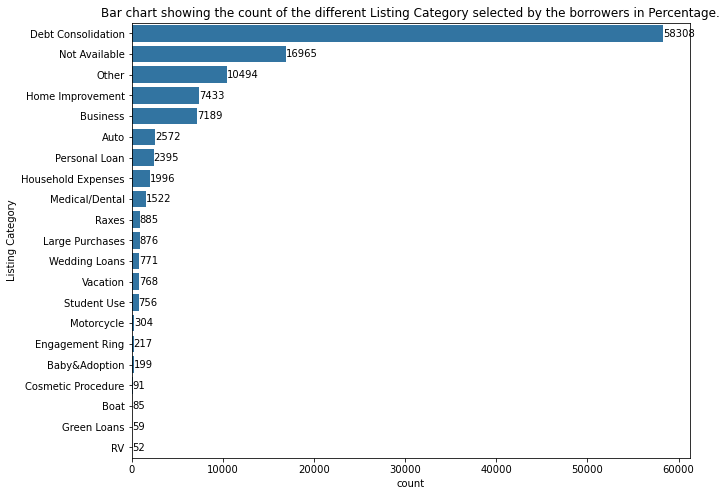

In [25]:
category_order = vars_of_interest['ListingCategory'].value_counts().index
category_counts = vars_of_interest['ListingCategory'].value_counts()

plt.figure(figsize = [10, 8])
sb.countplot(data = vars_of_interest, y = 'ListingCategory', color = base_color, order = category_order);

plt.title('Bar chart showing the count of the different Listing Category selected by the borrowers in Percentage.');
plt.ylabel('Listing Category');

for i in range(category_counts.shape[0]):
    count = category_counts[i]
    plt.text(count+1, i, count, va = 'center');

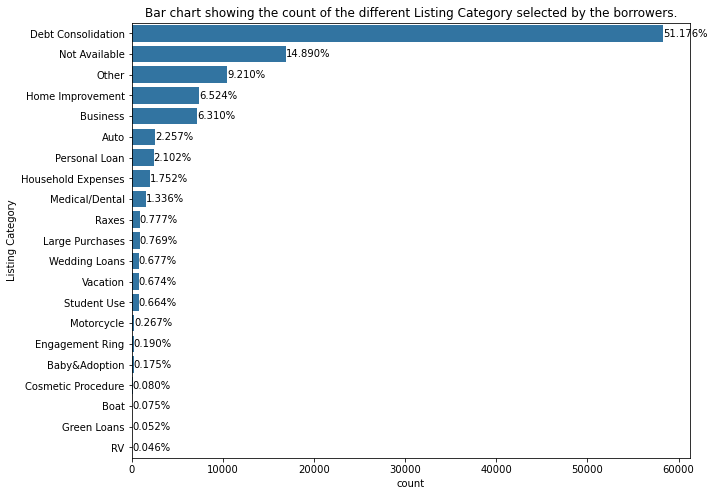

In [26]:
category_order = vars_of_interest['ListingCategory'].value_counts().index
category_counts = vars_of_interest['ListingCategory'].value_counts()

loan_number = vars_of_interest.shape[0]
plt.figure(figsize = [10, 8])
sb.countplot(data = vars_of_interest, y = 'ListingCategory', color = base_color, order = category_order);

plt.title('Bar chart showing the count of the different Listing Category selected by the borrowers.');
plt.ylabel('Listing Category');

for i in range(category_counts.shape[0]):
    count = category_counts[i]
    percentage = '{:0.3f}%'.format(100*count/loan_number)
    plt.text(count+1, i, percentage, va = 'center');

Of the 20 categories, Dept Consolidation has the most frequency with 51.176%, that is up to half of the population. This shows that, the majority of Loans borrowed from the platform are used to pay off other liabilities and consumer debt. The rest of the listing categories shares the remaining percentage with RV having the least which is 0.046% 

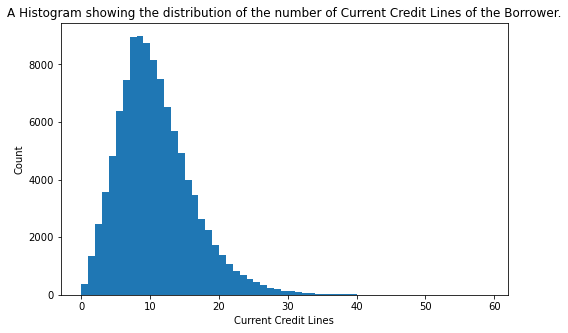

In [27]:
binsize = 1
bins = np.arange(0, vars_of_interest['CurrentCreditLines'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(data = vars_of_interest, x = "CurrentCreditLines", bins = bins);
plt.title('A Histogram showing the distribution of the number of Current Credit Lines of the Borrower.');
plt.ylabel('Count');
plt.xlabel('Current Credit Lines');

Plotting the `CurrentCreditLines` on a histogram shows a unimodal distribution of values with the peak at 9 and slightly skewed to the right with some staires-like slop.

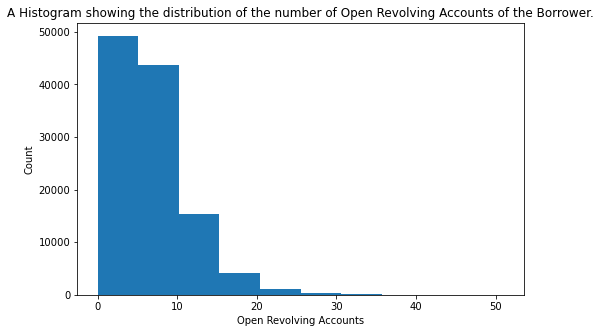

In [28]:
plt.figure(figsize = [8, 5]);
plt.hist(data = vars_of_interest, x = "OpenRevolvingAccounts");
plt.title('A Histogram showing the distribution of the number of Open Revolving Accounts of the Borrower.');
plt.ylabel('Count');
plt.xlabel('Open Revolving Accounts');

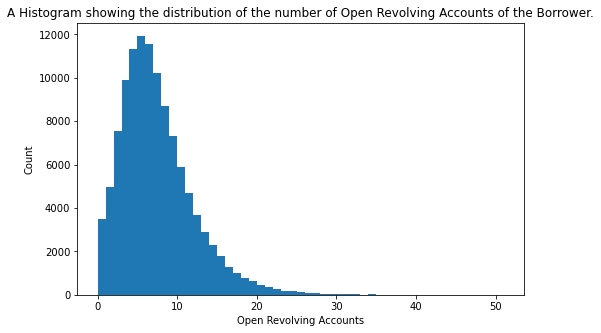

In [29]:
binsize = 1
bins = np.arange(0, vars_of_interest['OpenRevolvingAccounts'].max()+binsize, binsize)

plt.figure(figsize = [8,5]);
plt.hist(data = vars_of_interest, x = "OpenRevolvingAccounts", bins = bins);
plt.title('A Histogram showing the distribution of the number of Open Revolving Accounts of the Borrower.');
plt.ylabel('Count');
plt.xlabel('Open Revolving Accounts');

The distribution of the number of Open Revolving Accounts of the borrwer shows a unimodal distribution with the peak at 6 and slightly skewed to the right with a regular slop.

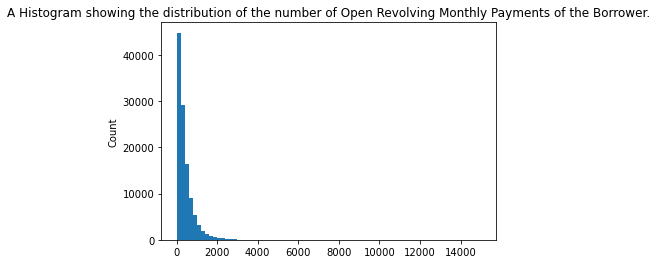

In [30]:
binsize = 200
bins = np.arange(0, vars_of_interest['OpenRevolvingMonthlyPayment'].max()+binsize, binsize)

plt.hist(data = vars_of_interest, x = "OpenRevolvingMonthlyPayment", bins = bins);
plt.title('A Histogram showing the distribution of the number of Open Revolving Monthly Payments of the Borrower.');
plt.ylabel('Count');

The distribution of the `OpenRevolvingMonthlyPayment` is completely right-skewed.

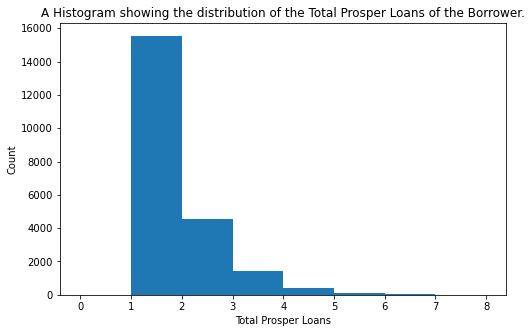

In [31]:
binsize = 1
bins = np.arange(0, vars_of_interest['TotalProsperLoans'].max()+binsize, binsize)

plt.figure(figsize = [8,5]);
plt.hist(data = vars_of_interest, x = "TotalProsperLoans", bins = bins);
plt.title('A Histogram showing the distribution of the Total Prosper Loans of the Borrower.');
plt.ylabel('Count');
plt.xlabel('Total Prosper Loans');

The distribution of the number of total prosper loans is completely right skewed.

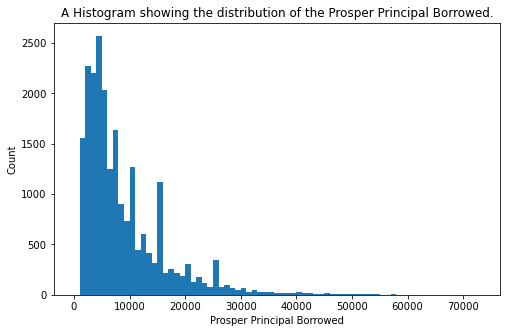

In [32]:
#Standard Scale
binsize = 1000
bins = np.arange(0, vars_of_interest['ProsperPrincipalBorrowed'].max()+binsize, binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = vars_of_interest, x = "ProsperPrincipalBorrowed", bins = bins);
plt.title('A Histogram showing the distribution of the Prosper Principal Borrowed.');
plt.ylabel('Count');
plt.xlabel('Prosper Principal Borrowed');

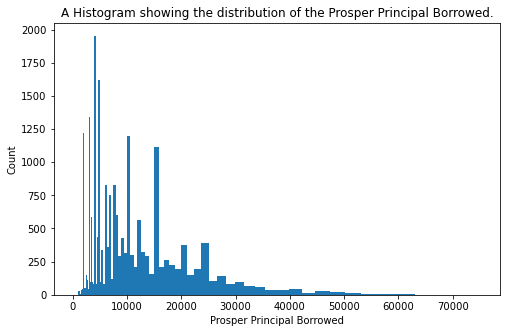

In [33]:
#Log Scale
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(vars_of_interest['ProsperPrincipalBorrowed'].max())+log_binsize, log_binsize)


plt.figure(figsize = [8, 5])
plt.hist(data = vars_of_interest, x = "ProsperPrincipalBorrowed", bins = bins);
plt.title('A Histogram showing the distribution of the Prosper Principal Borrowed.');
plt.ylabel('Count');
plt.xlabel('Prosper Principal Borrowed');

When the variable `ProsperPrincipalBorrowed` was plotted on a standard scale, the distribution formed was a right-skewed distribution with spikes to the right. 

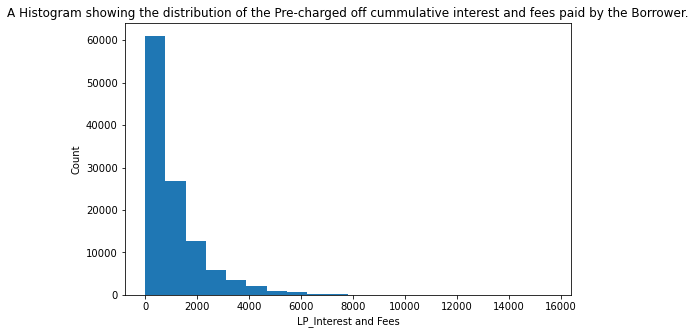

In [34]:
#Plot the distribution of the LP Interest and Fees
plt.figure(figsize = [8, 5])
plt.hist(data = vars_of_interest, x = "LP_InterestandFees", bins = 20);
plt.title('A Histogram showing the distribution of the Pre-charged off cummulative interest and fees paid by the Borrower.');
plt.ylabel('Count');
plt.xlabel('LP_Interest and Fees');

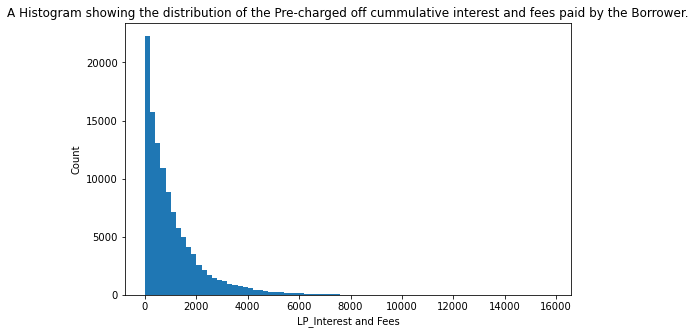

In [35]:
binsize = 200
bins = np.arange(0, vars_of_interest['LP_InterestandFees'].max()+binsize, binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = vars_of_interest, x = "LP_InterestandFees", bins = bins);
plt.title('A Histogram showing the distribution of the Pre-charged off cummulative interest and fees paid by the Borrower.');
plt.ylabel('Count');
plt.xlabel('LP_Interest and Fees');

The distribution of the `LP_InterestandFees` is completely right-skewed.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Loan Status variable had majority of its counts under the `current` category with almost half of the population being current. The bar chart showed that 49.556\% of the population are still within their loan term while 33.317\% have completed theirs. 10.525\% were charedoff while 4.404\% defaulted. The rest categories which includes the Past Due, Final Payment In Progress and Cancelled didn't amount to 2\% combined.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When plotted on a smaller bins, the BorrowerRate is seen to be unimodal and slightly scewed to the right. When the bins were adjusted, I discovered some high spikes down the right side of the distribution.

<span id = "bi"></span>

## Bivariate Exploration

In this section, we will investigate the relationships between two variables thereby plotting one variable against another.  We will focus more on the main variable of interest 'LoanStatus' and 'BorrowerRate'. We will be more focus on answering the following questions:

* What outcome affects the Loan's outcome status?
* What Affects the Borrowers Interest Rate?

In [36]:
#Creat a List of Categorical and Numerical variables
numerical_vars = ['BorrowerRate', 'BorrowerAPR', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 
                  'TotalProsperLoans', 'ProsperPrincipalBorrowed', 'LP_InterestandFees']
categorical_vars = ['LoanStatus', 'EmploymentStatus', 'ListingCategory']

Let us first view a heat map showing the relationships between all the numerical variables.

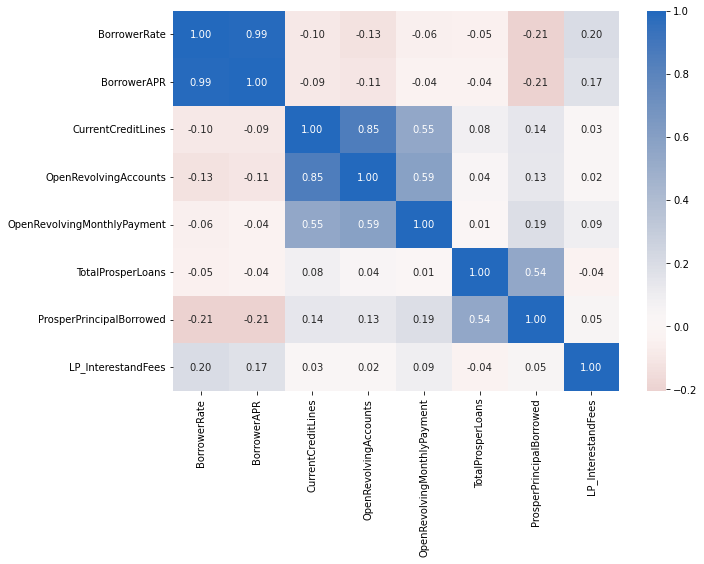

In [37]:
plt.figure(figsize = [10, 7])
sb.heatmap(vars_of_interest[numerical_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Question: What outcome affects the Loan's outcome status?


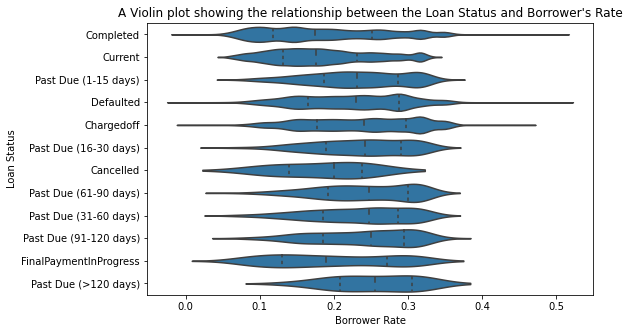

In [38]:
plt.figure(figsize = [8,5])
sb.violinplot(data = vars_of_interest, y = 'LoanStatus', x = 'BorrowerRate', color= base_color, inner = 'quartiles' );
plt.title('A Violin plot showing the relationship between the Loan Status and Borrower\'s Rate');
plt.ylabel('Loan Status');
plt.xlabel('Borrower Rate');

The Voilin plot shows the relationship of LoanStatus to BorrowerRate. The Completed, Current and FinalPaymentInProgress Status shows lower median that is below 0.2(20% Borrower's Rate) while the rest of the categories have higher median that is approximately 0.25(25% Borrower's Rate). This gives an impression that the positive outcomes of the LoanStatus (eg. Completed, FinalPaymentInProgress) are characterised with lower Borrower's Rate while the negative outcomes (e.g Defaulted, Past Due) are characterised with higher Borrower's Rate.

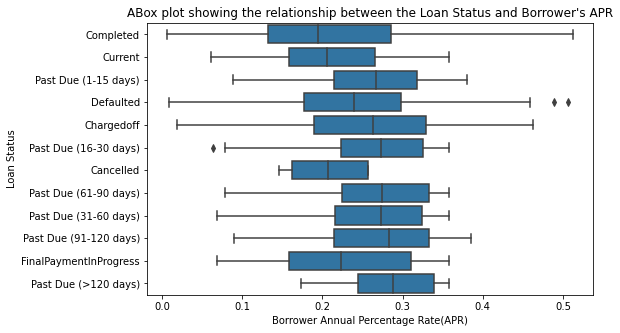

In [39]:
plt.figure(figsize = [8,5])
sb.boxplot(data = vars_of_interest, y = 'LoanStatus', x = 'BorrowerAPR', color= base_color );
plt.title('ABox plot showing the relationship between the Loan Status and Borrower\'s APR');
plt.ylabel('Loan Status');
plt.xlabel('Borrower Annual Percentage Rate(APR)');

Thesame observation on the BorrowerRate applies to the BorrowerAPR. Lower median for Completed and Current status but higher  median for Defaulted and Past Due.

Text(0.5, 1.0, 'Stacked bar char showing the relationship between the Loan Status and Employment Status.')

<Figure size 576x432 with 0 Axes>

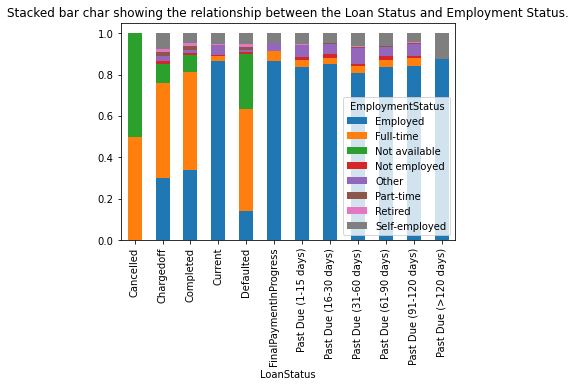

In [40]:
#Stacked barchart of the LoanStatus and EmploymentStatus

loan_vs_employment = pd.crosstab(vars_of_interest['LoanStatus'], vars_of_interest['EmploymentStatus'], normalize = 'index')

plt.figure(figsize = [8, 6]);
loan_vs_employment.plot.bar(stacked = True);
plt.xticks(rotation = 90);
plt.title('Stacked bar char showing the relationship between the Loan Status and Employment Status.')

From the chart, borrowers with Full-time  employment status completed the most Loans.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 1.0, 'Faceted Group bar chart of EmploymentStatus vs LoanStatus')

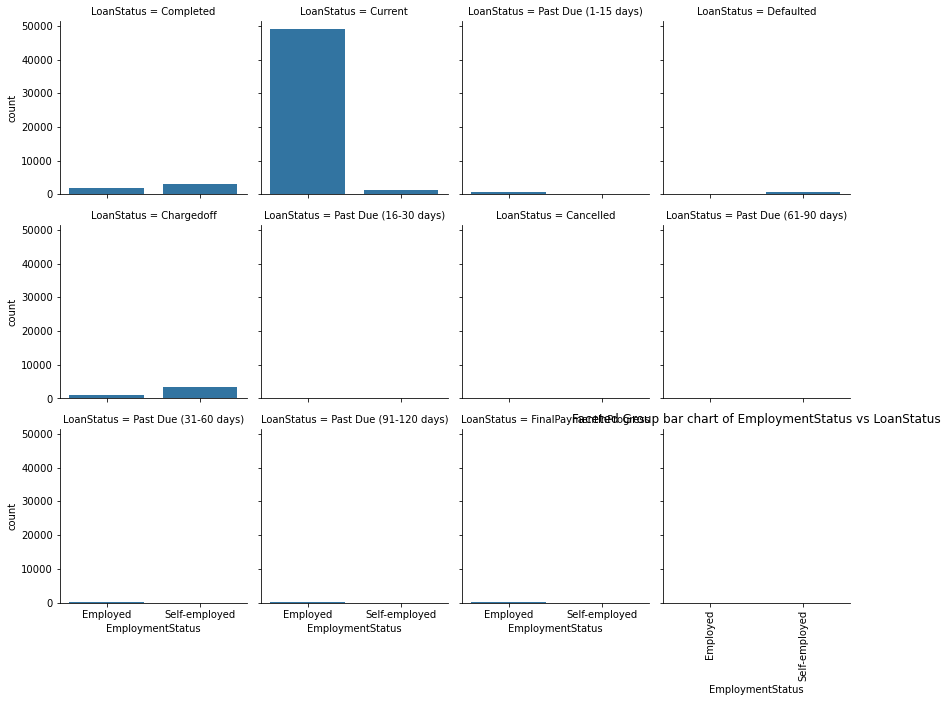

In [41]:
#Faceted group bar chart of the EmploymentStatus vs LoanStatus.
g = sb.FacetGrid(data = vars_of_interest, col = 'LoanStatus', col_wrap = 4);
g.map(sb.countplot, 'EmploymentStatus');
plt.xticks(rotation = 90);
plt.title('Faceted Group bar chart of EmploymentStatus vs LoanStatus')

<Figure size 1440x576 with 0 Axes>

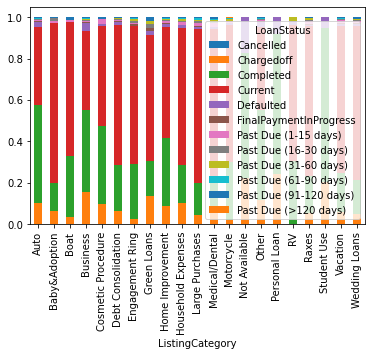

In [42]:
#Stacked Bar chart of the ListingCategory vs LoanStatus.
loan_vs_Listing = pd.crosstab(vars_of_interest['ListingCategory'], vars_of_interest['LoanStatus'],  normalize = 'index')

plt.figure(figsize = [20,8]);
loan_vs_Listing.plot.bar(stacked = True);
plt.xticks(rotation = 90);

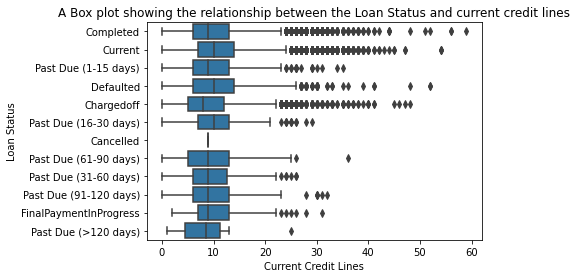

In [43]:
sb.boxplot(data = vars_of_interest, y = 'LoanStatus', x = 'CurrentCreditLines', color= base_color );
plt.title('A Box plot showing the relationship between the Loan Status and current credit lines');
plt.ylabel('Loan Status');
plt.xlabel('Current Credit Lines');

The median number of CurrentCreditLines of The Completed can be seen to be approximately 9, thesame as majority of the Past Due category. They are no much difference between  the median CurrentCreditLines categories with Defauted and current having a median of 10. 

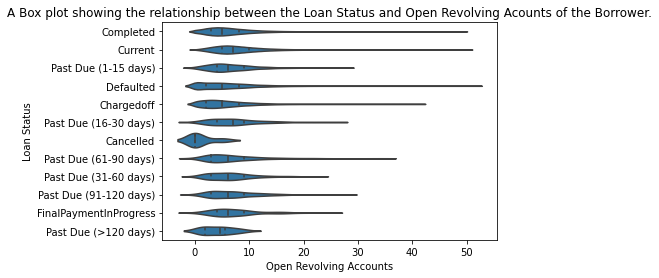

In [44]:
sb.violinplot(data = vars_of_interest, y = 'LoanStatus', x = 'OpenRevolvingAccounts', color= base_color, inner = 'quartiles' );
plt.title('A Box plot showing the relationship between the Loan Status and Open Revolving Acounts of the Borrower.');
plt.ylabel('Loan Status');
plt.xlabel('Open Revolving Accounts');

The median OpenRevolvingAccounts of all the Past Due categories are higher that the Completed. The Current category also have a high median.

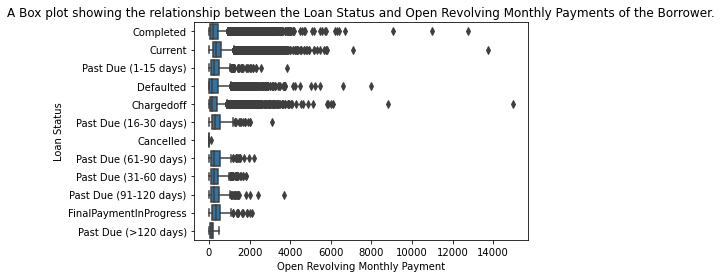

In [45]:
sb.boxplot(data = vars_of_interest, y = 'LoanStatus', x = 'OpenRevolvingMonthlyPayment', color= base_color);
plt.title('A Box plot showing the relationship between the Loan Status and Open Revolving Monthly Payments of the Borrower.');
plt.ylabel('Loan Status');
plt.xlabel('Open Revolving Monthly Payment');

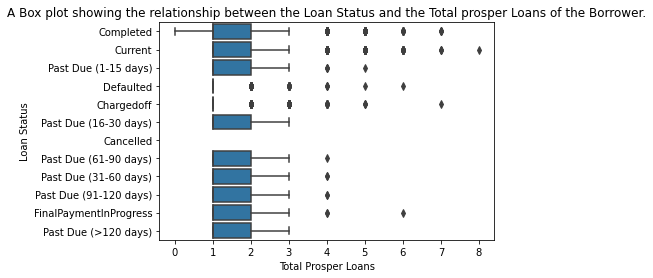

In [46]:
sb.boxplot(data = vars_of_interest, y = 'LoanStatus', x = 'TotalProsperLoans', color= base_color);
plt.title('A Box plot showing the relationship between the Loan Status and the Total prosper Loans of the Borrower.');
plt.ylabel('Loan Status');
plt.xlabel('Total Prosper Loans');

### Question: What Affects the Borrowers Interest Rate?

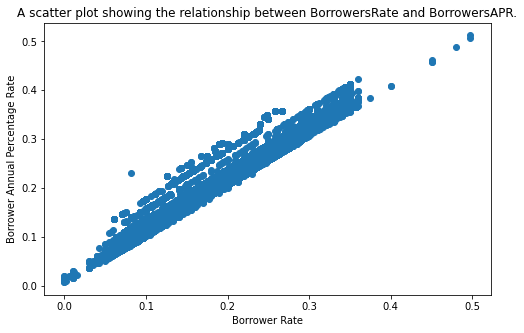

In [47]:
plt.figure(figsize = [8,5]);
plt.scatter(data = vars_of_interest, x = 'BorrowerRate', y = 'BorrowerAPR');
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower Annual Percentage Rate');
plt.title('A scatter plot showing the relationship between BorrowersRate and BorrowersAPR.');

The scatter plot between the BorrowerRate and BorrowerAPR shows a positive corrolation between them. This indicates that, as the BorrowerRate increases the BorrowerAPR increases as well.

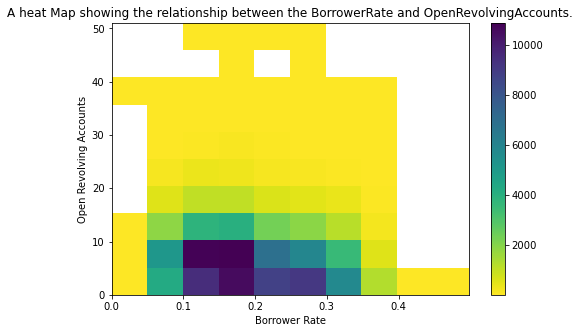

In [48]:
plt.figure(figsize = [8,5]);
plt.hist2d(data = vars_of_interest, x = 'BorrowerRate', y='OpenRevolvingAccounts', cmap = 'viridis_r', cmin = 1);
plt.colorbar();
plt.title('A heat Map showing the relationship between the BorrowerRate and OpenRevolvingAccounts.')
plt.xlabel('Borrower Rate');
plt.ylabel('Open Revolving Accounts');

The heat map between the BorrowerRate and OpenRevolvingAccount shows that a lot (up to 10000) of borrowers with BorrowersRate between 0.1 and 0.2 have about 5 to 10 OpenRevolvingAccount. 

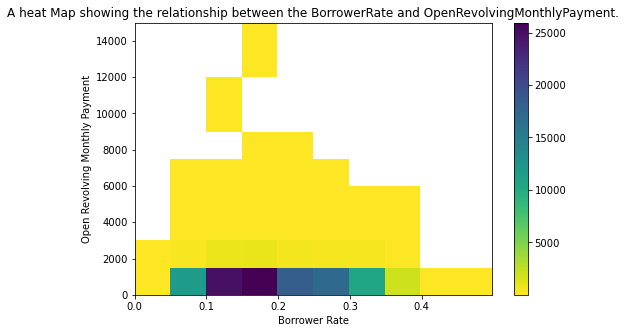

In [49]:
plt.figure(figsize = [8,5]);
plt.hist2d(data = vars_of_interest, x = 'BorrowerRate', y='OpenRevolvingMonthlyPayment', cmap = 'viridis_r', cmin = 1);
plt.colorbar();
plt.title('A heat Map showing the relationship between the BorrowerRate and OpenRevolvingMonthlyPayment.')
plt.xlabel('Borrower Rate');
plt.ylabel('Open Revolving Monthly Payment');

The heat map between the BorrowerRate and OpenRevolvingMonthlyPayment shows that greater population of the borrower pays less that 2000 in their OpenRevolvingAccounts and majority of them has BorrowerRate within 0.15 to 0.2.

vars_of_interest.shape= (113937, 11)
loan_samp.shape= (2000, 11)


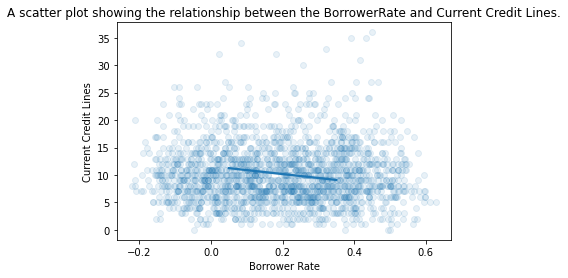

In [50]:
#plot regplot of a sample of 2000 borrowers.
plt.figure(figsize = [6,4]);
print("vars_of_interest.shape=",vars_of_interest.shape)
loan_samp = vars_of_interest.sample(n=2000, replace = False)
print("loan_samp.shape=",loan_samp.shape)

sb.regplot(data = loan_samp, x = 'BorrowerRate', y='CurrentCreditLines', x_jitter = 0.3, scatter_kws = {'alpha' : 1/10});
plt.title('A scatter plot showing the relationship between the BorrowerRate and Current Credit Lines.');
plt.xlabel('Borrower Rate');
plt.ylabel('Current Credit Lines');

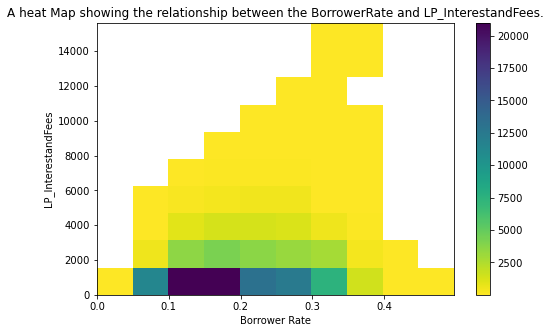

In [51]:
plt.figure(figsize = [8,5]);
plt.hist2d(data = vars_of_interest, x = 'BorrowerRate', y='LP_InterestandFees', cmap = 'viridis_r', cmin = 1);
plt.colorbar();
plt.title('A heat Map showing the relationship between the BorrowerRate and LP_InterestandFees.')
plt.xlabel('Borrower Rate');
plt.ylabel('LP_InterestandFees');

This heat map between the BorrowerRate and LP_InterestandFees shows that greater population of the borrower pays less than 2000 in their LP_InterestandFees and majority of them has BorrowerRate within 0.1 to 0.2.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the violin plot of the LoanStatus and BorrowerRate, it was discovered that the median of the Completed and FinalPaymentInProgress Status where lower than those of Defaulted and Past Due. This signifies that lower Borrower's Rates are mostly associated with a positive outcome of the LoanStatus while higher Borrower's Rates are associated with the negative outcomes. This also applies to the BorrowersAPR. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The scatter plot between the BorrowerRate and BorrowerAPR shows a positive corrolation between them. This indicates that when the BorrowerRate increases the BorrowerAPR increases as well.


<span id = "multi"></span>

## Multivariate Exploration

In this section, we will create plots of three or more variables to further investigate the variables of interest. 

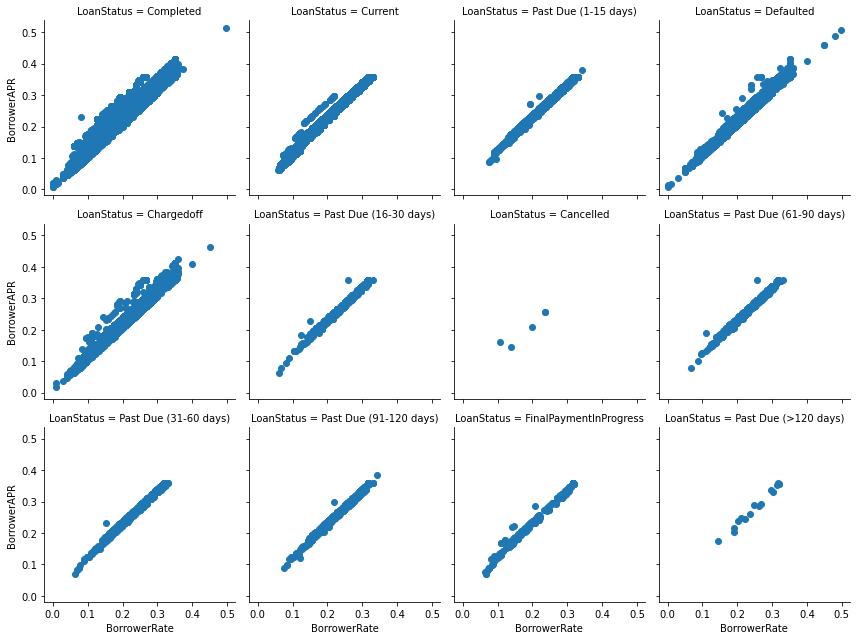

In [52]:
g = sb.FacetGrid(data = vars_of_interest, col = 'LoanStatus', col_wrap = 4);
g.map(plt.scatter, 'BorrowerRate', 'BorrowerAPR' );

From the Faceted Scatter plot we just plotted on each category of LoanStatus  comparing their BorrowerRate and BorrowerAPR, it can be seen that for each category of LoanStatus, the BorrowerAPR increases as the BorrowerRate increase. We can say that, they are positively corrolated for each category of LoanStatus. 

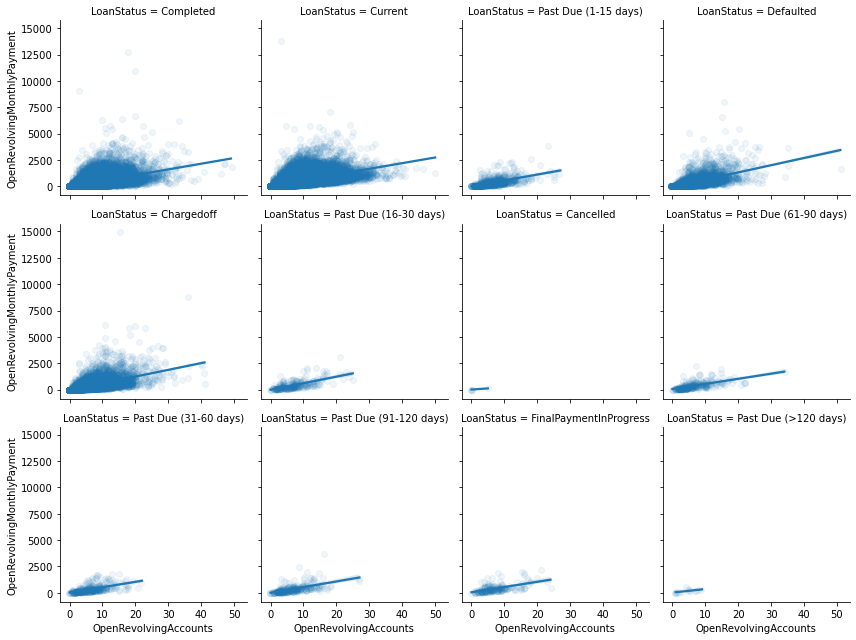

In [53]:
g = sb.FacetGrid(data = vars_of_interest, col = 'LoanStatus', col_wrap = 4);
g.map(sb.regplot,'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',x_jitter = 0.3, scatter_kws = {'alpha' : 1/15} );

The faceted regplot shows how the OpenRevolvingAccounts and OpenRevolvingMonthlyPayment relates in all the LoanStatus categories. In each of the plots, the regression line rises to the right indicating that the OpenRevolvingMonthlyPayment increases as the OpenRevolvingAccounts increase in all categories of the LoanStatus.

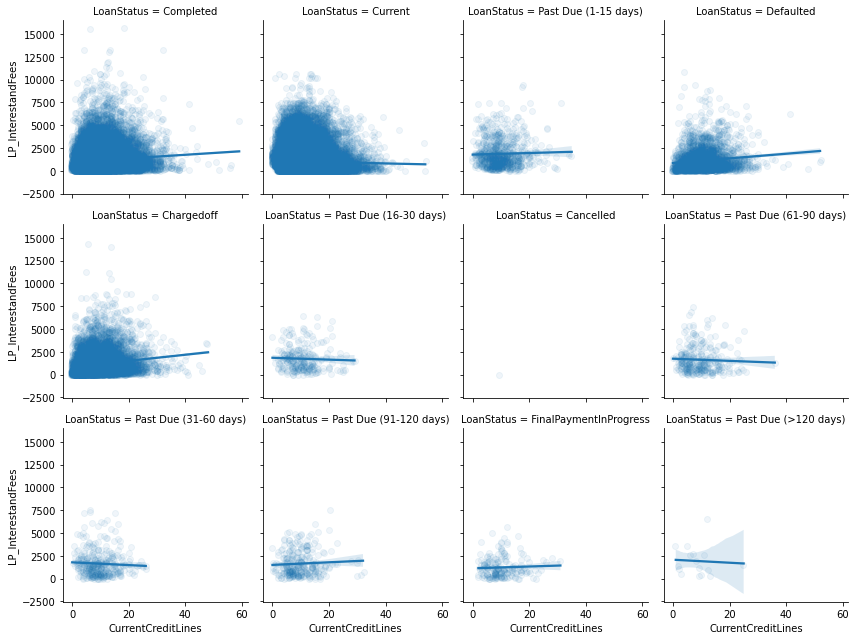

In [54]:
g = sb.FacetGrid(data = vars_of_interest, col = 'LoanStatus', col_wrap = 4);
g.map(sb.regplot,'CurrentCreditLines', 'LP_InterestandFees',x_jitter = 0.3, scatter_kws = {'alpha' : 1/15} );

The Faceted grid showing the regplot between CurrentCreditLines and LP_InterestandFees of all LoanStatus categories shows an inconsistent pattern in the regression lines. It shows increase in the regression line of Completeted, Defaulted and ChargedOff with ChargedOff and Defaulted being more prominent.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I continued my investigation by comparing the BorrowerRate to the BorrowerAPR in each categories of the LoanStatus. The multivariate exploration of the data using a Faceted scatter plot shows that, for each of the Loan Status there is an increase in the BorrowerRate as the BorrowerAPR increases.

### Were there any interesting or surprising interactions between features?

Going back to the plots, we see the relationship between the `OpenRevolvingAccounts` and `OpenRevolvingMonthlyPayment`. It is seen that these two variables also have a positive corrolation between them.

<span id = "conclusion"></span>
## Conclusions

From the data exploration of the Prosper Loan Data, the Loan Status (LoanStatus) was the main focus of the exploration. We explored what outcomes that affects the LoanStatus from the dataset.

We discovered that, the BorrowerRate had more impact on the status of the loans borrowed from Prosper Loans. It was discovered that the Loan status categories with a more positive outcome like the completed and FinalPaymentInProgress had lesser median value than those with negative outcome like Defaulted and Past Due that had higher median values. This was an indication that  higher borrower rate were more concentrated  in categories that indicates negative outcomes than those of positive outcomes.

Aside the main variable of interest `LoanStatus`, we also explored how the other variables of interest relates to the `BorrowerRate`. We noticed that the `BorrowerRate` and the `BorrowerAPR` are positively corrolated.

Before we arrived at this conclusions, we walked through some series of steps in exploring the data. They incluse:- 

* First, We carried out some preliminary wrangling on the data. This involved loading the dataset and performing some cleaning operation on it like changing the ListingCategory from int to object datatype and replacing the numeric values to their corresponding categories.

* We then performed some univariate exploration on the variables of interest to see how the data is distributed.

* Next, we did some bivariate analysis on the variables of interest to observed how they relate with other variables

* Lastly, we completed the analysis by carrying out some multivariate exploration on the variable of interest, comparing it with other variables.